In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [2]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260205/5_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_Background.csv'))
dfs.append(pd.read_csv('../data/260205/6_SiPM_ChannelsTest_Ch5-8_Ch6_QT_Thr20_Background.csv'))
dfs.append(pd.read_csv('../data/260205/7_SiPM_ChannelsTest_Ch5-8_Ch10_QT_Thr20_Background.csv'))
dfs.append(pd.read_csv('../data/260205/8_SiPM_ChannelsTest_Ch5-8_Ch14_QT_Thr20_Background.csv'))

dfs[0]

,Unnamed: 0,Detector,ID,Trigger,Time_sub,Time_sec,Time_gps,Temp,Ch1,Ch2,...,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Argmax,Summed
0,0,5.0,401139.0,21.0,2310347.0,9687.0,42069.0,149.432817,150.0,230.0,...,129.0,140.0,123.0,117.0,120.0,118.0,108.0,135.0,2.0,2086.0
1,1,5.0,401140.0,20.0,2310347.0,9687.0,42069.0,149.432817,149.0,266.0,...,129.0,138.0,122.0,116.0,120.0,118.0,106.0,135.0,2.0,2113.0
2,2,5.0,401141.0,21.0,3799888.0,9687.0,42069.0,149.432817,150.0,211.0,...,127.0,140.0,123.0,116.0,119.0,118.0,108.0,135.0,2.0,2062.0
3,3,5.0,401142.0,20.0,3799888.0,9687.0,42069.0,149.432817,150.0,626.0,...,130.0,141.0,123.0,118.0,121.0,119.0,108.0,135.0,2.0,2487.0
4,4,5.0,401143.0,21.0,3949203.0,9687.0,42069.0,149.432817,150.0,225.0,...,127.0,140.0,122.0,117.0,119.0,119.0,107.0,135.0,2.0,2072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99831,99831,5.0,501130.0,21.0,8088842.0,9856.0,42069.0,149.432817,150.0,474.0,...,129.0,139.0,123.0,117.0,120.0,119.0,109.0,136.0,2.0,2331.0
99832,99832,5.0,501131.0,21.0,8230393.0,9856.0,42069.0,149.432817,152.0,559.0,...,129.0,140.0,123.0,118.0,120.0,119.0,107.0,135.0,2.0,2423.0
99833,99833,5.0,501132.0,20.0,8230393.0,9856.0,42069.0,149.432817,150.0,862.0,...,129.0,141.0,124.0,118.0,121.0,119.0,109.0,136.0,2.0,2727.0
99834,99834,5.0,501133.0,21.0,8416551.0,9856.0,42069.0,149.432817,151.0,492.0,...,129.0,141.0,124.0,118.0,120.0,119.0,108.0,136.0,2.0,2354.0


In [3]:
import matplotlib.pyplot as plt

N_BINS = 512
BITS_12 = 2**12

summed_spectra = [df[ch].tolist() for df, ch in zip(dfs, ['Ch2', 'Ch6', 'Ch10', 'Ch14'])]

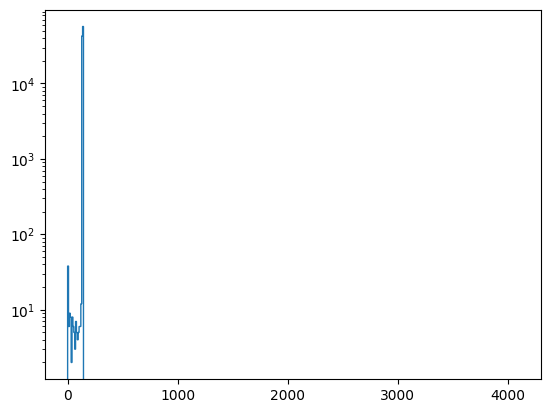

In [4]:
import numpy as np
times = [162.847, 180.959, 169.660, 136.229]
plt.hist(dfs[0]['Ch16'], N_BINS, range=(0,BITS_12), log=True, histtype='step')
plt.show()

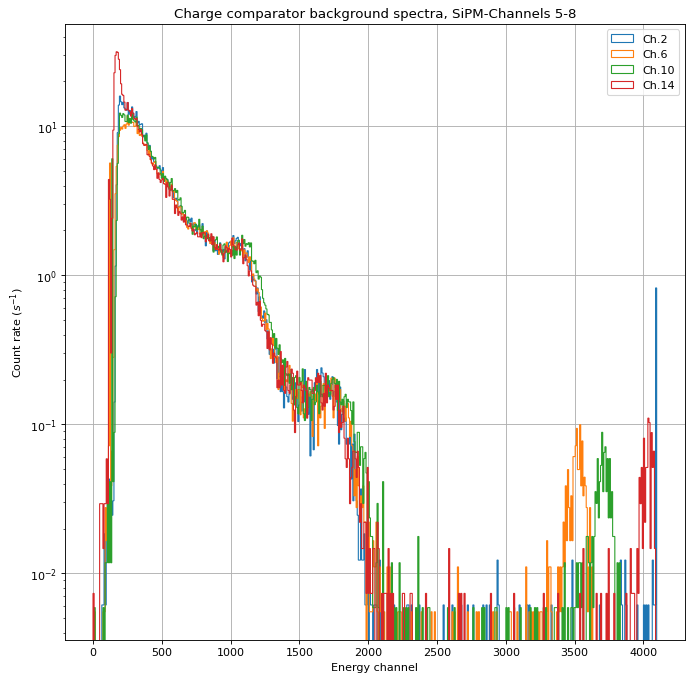

In [5]:
import numpy as np
times = [162.847, 180.959, 169.660, 136.229]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.6', 'Ch.10', 'Ch.14']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Charge comparator background spectra, SiPM-Channels 5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()


In [6]:
dfs_ch1_4 = []
dfs_ch1_4.append(pd.read_csv('../data/260205/9_SiPM_ChannelsTest_Ch1-4_Ch14_QT_Thr20_Background_retry.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260205/10_SiPM_ChannelsTest_Ch1-4_Ch10_QT_Thr20_Background_retry.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260205/11_SiPM_ChannelsTest_Ch1-4_Ch6_QT_Thr20_Background_retry.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260205/12_SiPM_ChannelsTest_Ch1-4_Ch2_QT_Thr20_Background_retry.csv'))

#dfs_ch1_4 = dfs_ch1_4[::-1]
single_ch_spectra = [df[ch].tolist() for df, ch in zip(dfs_ch1_4, ['Ch14', 'Ch10', 'Ch6', 'Ch2'])]

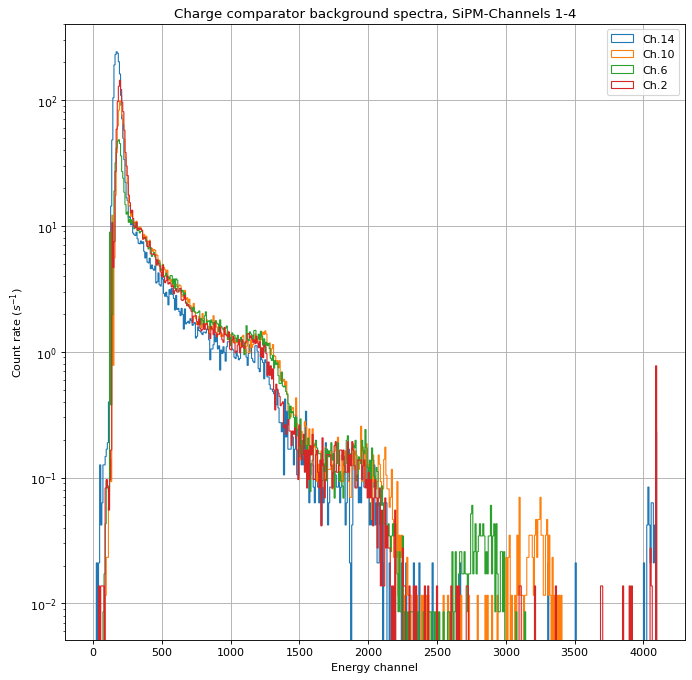

In [7]:
times_ch1_4 = [47.626, 86.144, 116.448, 72.604]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.14', 'Ch.10', 'Ch.6', 'Ch.2']
for idx,s in enumerate(single_ch_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Charge comparator background spectra, SiPM-Channels 1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

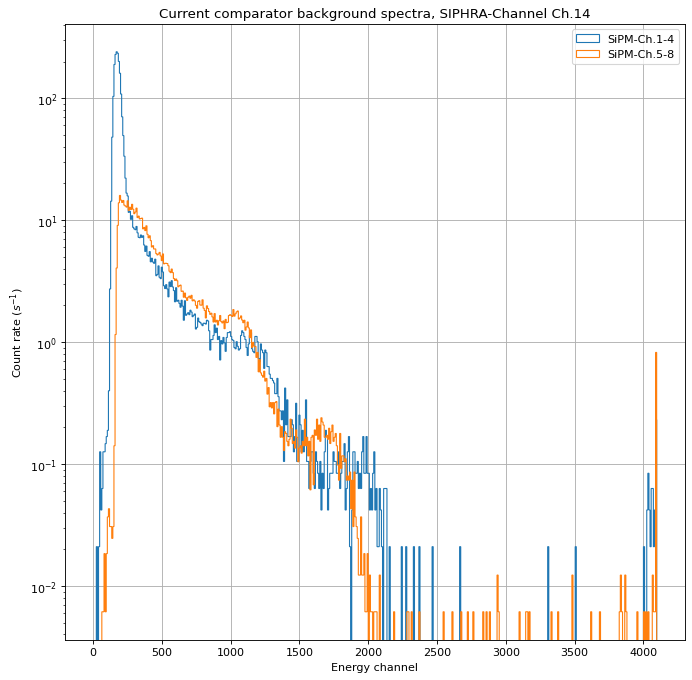

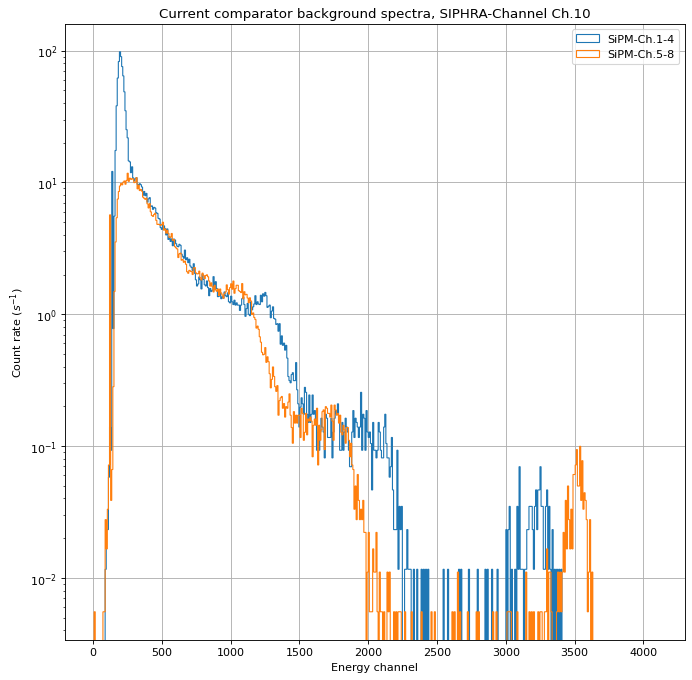

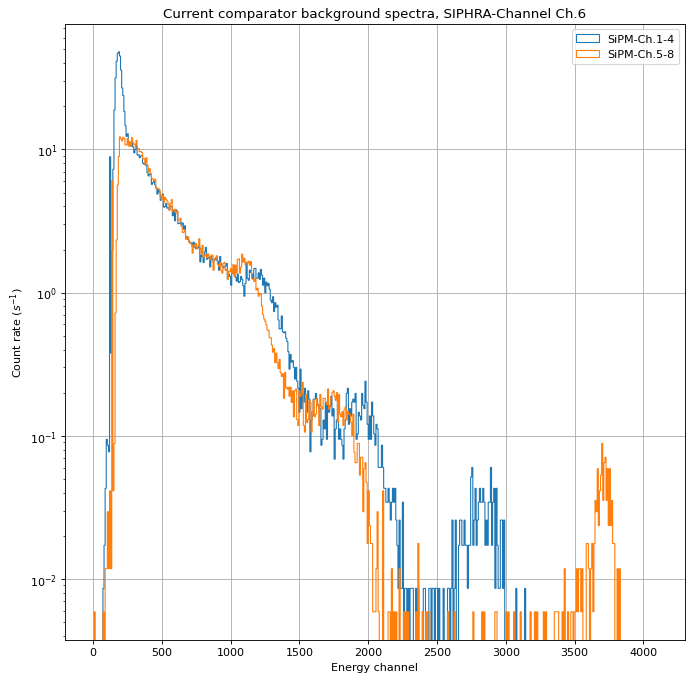

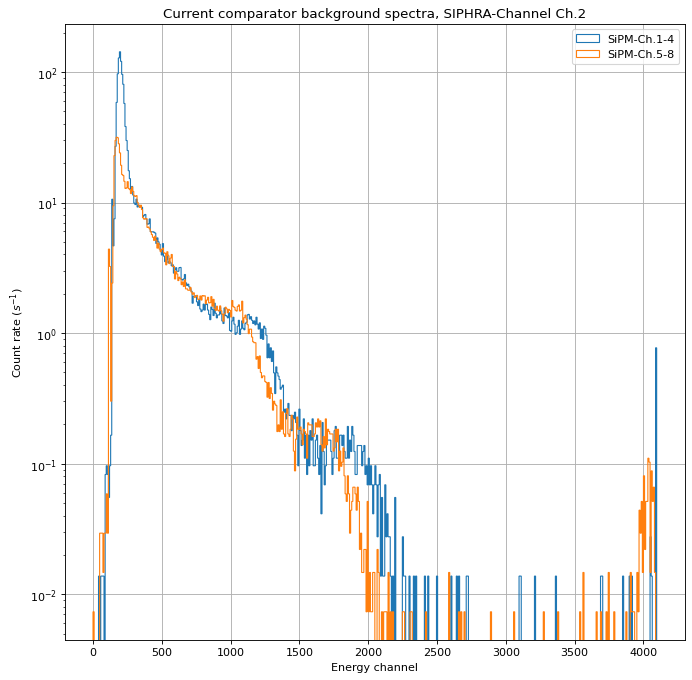

In [8]:
for idx, (spct1, spct2) in enumerate(zip(summed_spectra, single_ch_spectra)):
    plt.figure(figsize=(10,10), dpi=80)
    plt.hist(spct2, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(spct2), log=True, histtype='step', label='SiPM-Ch.1-4')
    plt.hist(spct1, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(spct1), log=True, histtype='step', label='SiPM-Ch.5-8')
    plt.legend()
    plt.xlabel(r'Energy channel')
    plt.ylabel(r'Count rate ($s^{-1}$)')
    plt.title('Current comparator background spectra, SIPHRA-Channel '+legend[idx])
    plt.xticks(np.arange(0,4500,500))
    plt.grid()
    plt.show()